** Load the Data**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('1730285881-Airbnb_Open_Data.csv') # Make sure to replace 'your_file_name.csv' with the actual file name

# Display the first few rows of the dataframe
print(df.head())

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United St

/tmp/ipython-input-2953701501.py:6: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1730285881-Airbnb_Open_Data.csv') # Make sure to replace 'your_file_name.csv' with the actual file name


**Data Exploration**

In [5]:
# Get a concise summary of the dataframe
print("\n--- Data Info ---")
df.info()

# Get descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 1

**Data Cleaning**

In [6]:
# --- Data Cleaning ---

# Check for the number of missing values in each column
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Fill missing 'reviews per month' and 'review rate number' with their mean
df['reviews per month'].fillna(df['reviews per month'].mean(), inplace=True)
df['review rate number'].fillna(df['review rate number'].mean(), inplace=True)

# Fill missing 'last review' with the most frequent date
df['last review'].fillna(df['last review'].mode()[0], inplace=True)

# Clean 'price' and 'service fee' columns and convert to numeric
df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

# Drop rows where price or service fee might be null after cleaning
df.dropna(subset=['price', 'service fee'], inplace=True)

print("\n--- Data Cleaned ---")


--- Missing Values ---
id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                 

/tmp/ipython-input-1747089684.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews per month'].fillna(df['reviews per month'].mean(), inplace=True)
/tmp/ipython-input-1747089684.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

**Data Visualization**

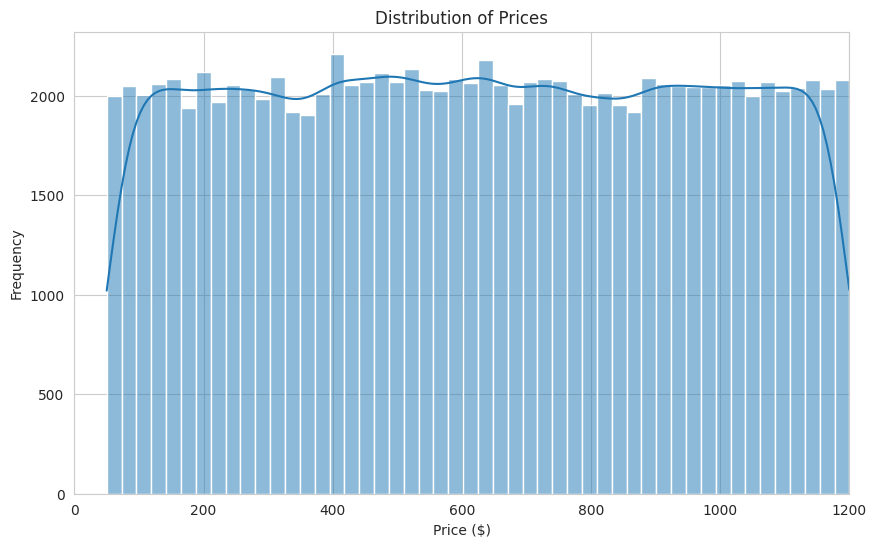

In [7]:
# Set plot style
sns.set_style('whitegrid')

# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 1200) # Limiting x-axis for better readability
plt.savefig('price_distribution.png')
plt.show()

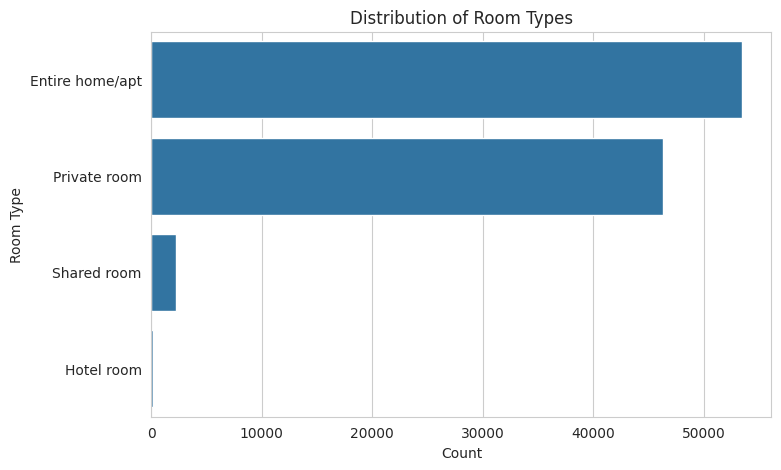

In [8]:
# Room Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y='room type', data=df, order=df['room type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.savefig('room_type_distribution.png')
plt.show()

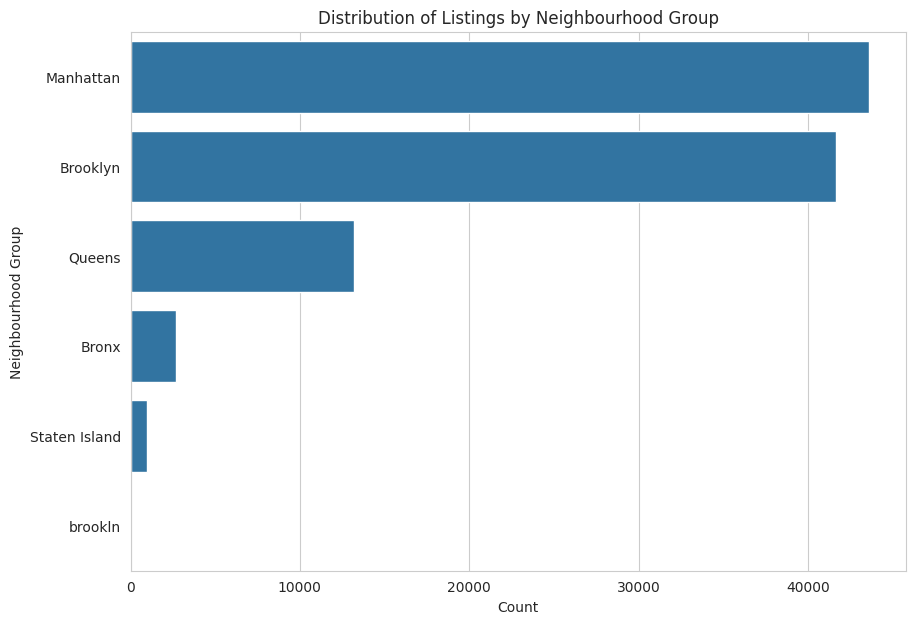

In [9]:
# Neighbourhood Group Distribution
plt.figure(figsize=(10, 7))
sns.countplot(y='neighbourhood group', data=df, order=df['neighbourhood group'].value_counts().index)
plt.title('Distribution of Listings by Neighbourhood Group')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
plt.savefig('neighbourhood_group_distribution.png')
plt.show()

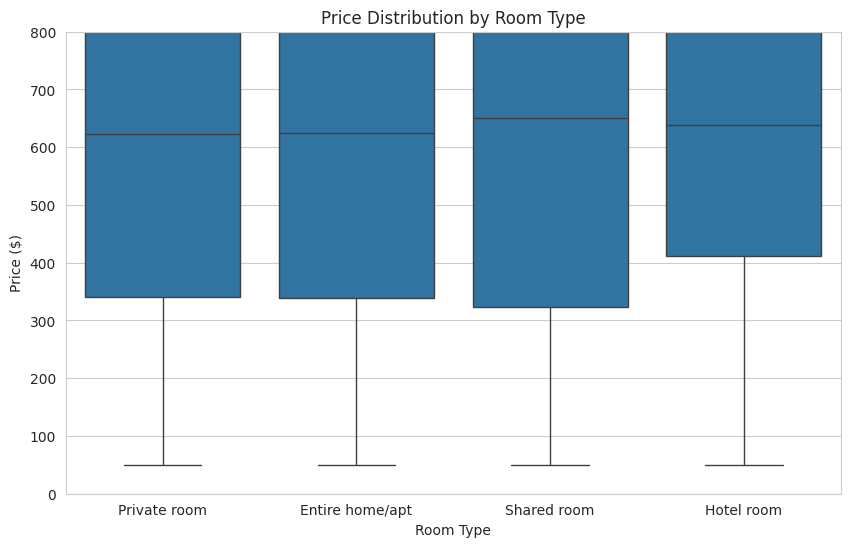

In [10]:
# Price by Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, 800) # Limiting y-axis for better readability
plt.savefig('price_by_room_type.png')
plt.show()

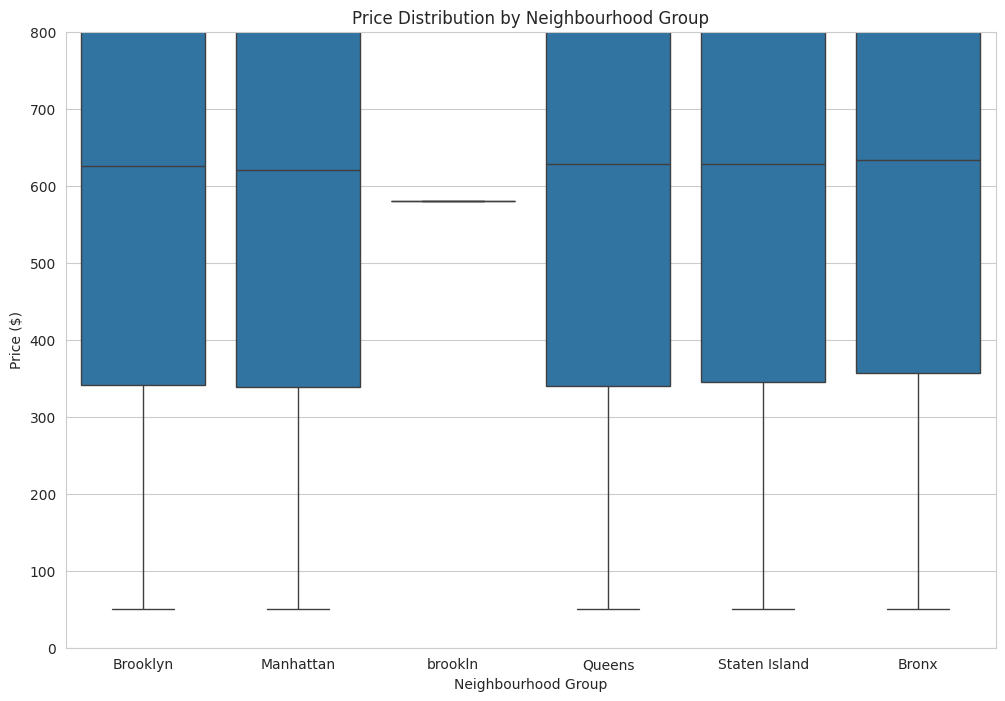

In [11]:
# Price by Neighbourhood Group
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price ($)')
plt.ylim(0, 800) # Limiting y-axis for better readability
plt.savefig('price_by_neighbourhood_group.png')
plt.show()

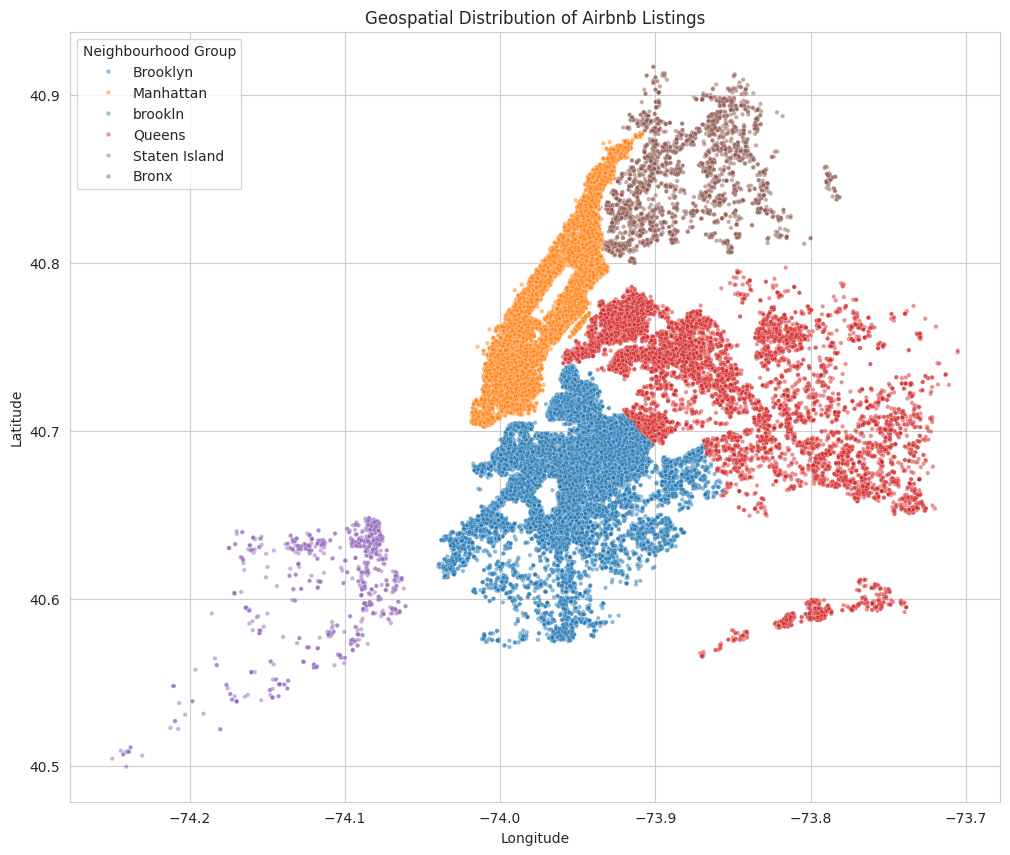

In [12]:
# Geospatial Distribution of Listings
plt.figure(figsize=(12, 10))
sns.scatterplot(x='long', y='lat', hue='neighbourhood group', data=df, s=10, alpha=0.5)
plt.title('Geospatial Distribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group')
plt.savefig('geospatial_distribution.png')
plt.show()

*1. What are the different property types in the Dataset?*

In [16]:
# --- Step: Get the quantity of each property type ---
# Use value_counts() to count the occurrences
property_quantities_series = df['room type'].value_counts()

# --- Step: Convert the results to a DataFrame ---
# This makes it easy to export to a CSV with proper headers
property_quantities_df = property_quantities_series.reset_index()
property_quantities_df.columns = ['Property Type', 'Number of Listings']


# --- Step: Export the DataFrame to a CSV file ---
output_filename = 'property_type_quantities.csv'
property_quantities_df.to_csv(output_filename, index=False)

print(f"\n✅ Successfully exported the data to '{output_filename}'")
print("\nYou can find the file in the Colab file explorer on the left.")
print("\nHere is a preview of the data that was exported:")
print(property_quantities_df)


✅ Successfully exported the data to 'property_type_quantities.csv'

You can find the file in the Colab file explorer on the left.

Here is a preview of the data that was exported:
     Property Type  Number of Listings
0  Entire home/apt               53454
1     Private room               46330
2      Shared room                2215
3       Hotel room                 114



📊 Generating plot...


/tmp/ipython-input-4196735332.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


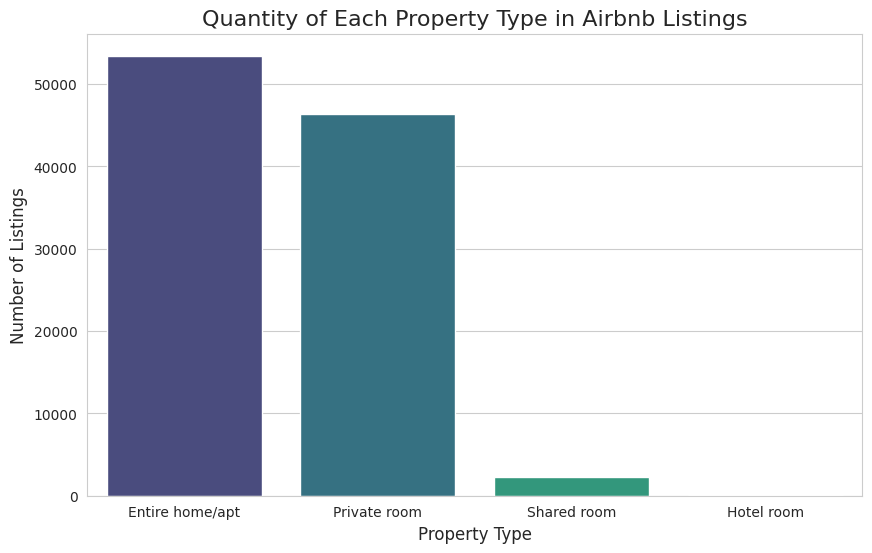

In [17]:
# --- Step: Get the quantity of each property type ---
# Use value_counts() to count the occurrences of each unique value
property_quantities = df['room type'].value_counts()


# --- Step: Create the plot ---
print("\n📊 Generating plot...")

# Set the style and figure size for the plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot using seaborn for a nice aesthetic
# We use the index of the series for the x-axis and values for the y-axis
sns.barplot(
    x=property_quantities.index,
    y=property_quantities.values,
    palette="viridis" # You can change the color palette
)

# Add a title and clear labels for the axes
plt.title('Quantity of Each Property Type in Airbnb Listings', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

# Ensure the x-axis labels are not overlapping
plt.xticks(rotation=0)

# Display the plot in the Colab output
plt.show()


*2. Which neighborhood group has the highest number of listings?*

In [19]:
try:
    df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')
    print("--- 2. Neighborhood Group with Most Listings ---")
    highest_listings_group = df['neighbourhood group'].value_counts().idxmax()
    listings_count = df['neighbourhood group'].value_counts().max()
    print(f"The neighborhood group with the highest number of listings is: '{highest_listings_group}' with {listings_count} listings.")
except FileNotFoundError:
    print("❌ Error: Dataset file not found. Please upload the file to your Colab session.")

--- 2. Neighborhood Group with Most Listings ---
The neighborhood group with the highest number of listings is: 'Manhattan' with 43792 listings.


/tmp/ipython-input-3115486121.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')


3. Which neighborhood group has the highest average price?


In [20]:
import pandas as pd

try:
    df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')
    # Clean the price column for accurate calculation
    df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
    df.dropna(subset=['price'], inplace=True)

    print("--- 3. Neighborhood Group with Highest Average Price ---")
    avg_price_by_group = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
    print(avg_price_by_group.round(2))
except FileNotFoundError:
    print("❌ Error: Dataset file not found. Please upload the file to your Colab session.")

--- 3. Neighborhood Group with Highest Average Price ---
neighbourhood group
Queens           630.21
Bronx            627.77
Brooklyn         626.56
Staten Island    624.49
Manhattan        622.44
brookln          580.00
manhatan         460.00
Name: price, dtype: float64


/tmp/ipython-input-2099737488.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')


4. Is there a relationship between construction year and price?

/tmp/ipython-input-3809867412.py:6: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')


--- 4. Relationship between Construction Year and Price ---
The correlation between construction year and price is: -0.0038



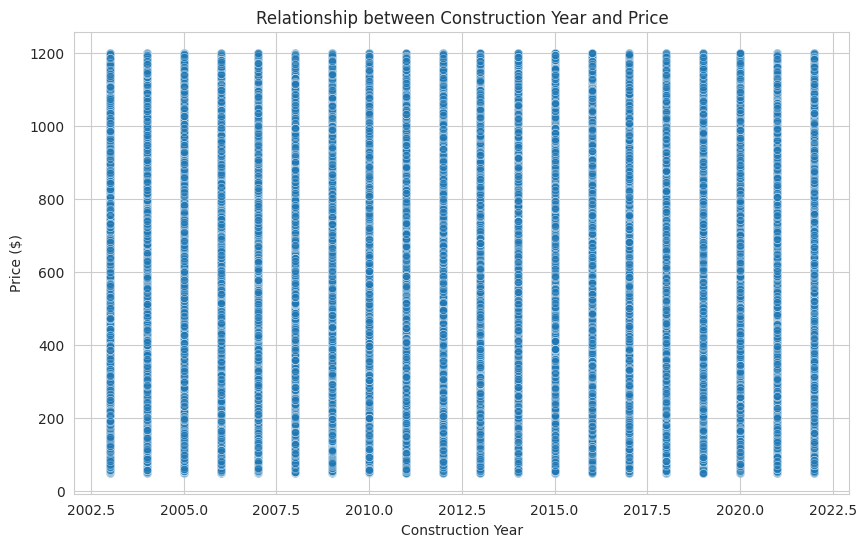

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')
    # Clean and prepare the data
    df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
    df.dropna(subset=['price', 'Construction year'], inplace=True)
    df['Construction year'] = df['Construction year'].astype(int)

    print("--- 4. Relationship between Construction Year and Price ---")
    correlation_year_price = df['Construction year'].corr(df['price'])
    print(f"The correlation between construction year and price is: {correlation_year_price:.4f}\n")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Construction year', y='price', data=df, alpha=0.5)
    plt.title('Relationship between Construction Year and Price')
    plt.xlabel('Construction Year')
    plt.ylabel('Price ($)')
    plt.show()

except FileNotFoundError:
    print("❌ Error: Dataset file not found. Please upload the file to your Colab session.")

**5. Who are the top 10 hosts by listing count?**

In [22]:
import pandas as pd

try:
    df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')
    print("--- 5. Top 10 Hosts by Listing Count ---")
    # Group by both host id and name to avoid ambiguity, get the first listing count for each host, sort and show top 10
    top_10_hosts = df.groupby(['host id', 'host name'])['calculated host listings count'].first().sort_values(ascending=False).head(10)
    print(top_10_hosts)
except FileNotFoundError:
    print("❌ Error: Dataset file not found. Please upload the file to your Colab session.")

--- 5. Top 10 Hosts by Listing Count ---
host id      host name 
76431087156  Blueground    332.0
695353567    Blueground    332.0
97620664846  Blueground    332.0
58398584635  Blueground    332.0
52760110374  Blueground    332.0
59913507223  Blueground    332.0
69623510966  Blueground    332.0
20052088242  Blueground    332.0
83842788941  Blueground    332.0
46384126745  Blueground    332.0
Name: calculated host listings count, dtype: float64


/tmp/ipython-input-1124891640.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')


6. Are hosts with verified identities more likely to receive positive reviews?

In [23]:
import pandas as pd

try:
    df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')
    print("--- 6. Verified Identities vs. Review Ratings ---")
    avg_review_by_verification = df.groupby('host_identity_verified')['review rate number'].mean()
    print("Average review rate by host identity verification:")
    print(avg_review_by_verification.round(3))
except FileNotFoundError:
    print("❌ Error: Dataset file not found. Please upload the file to your Colab session.")

--- 6. Verified Identities vs. Review Ratings ---
Average review rate by host identity verification:
host_identity_verified
unconfirmed    3.272
verified       3.287
Name: review rate number, dtype: float64


/tmp/ipython-input-1154041083.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')


7. Is there a correlation between the price and service fee?

/tmp/ipython-input-1308477507.py:6: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')


--- 7. Correlation between Price and Service Fee ---
The correlation between price and service fee is: 1.0000



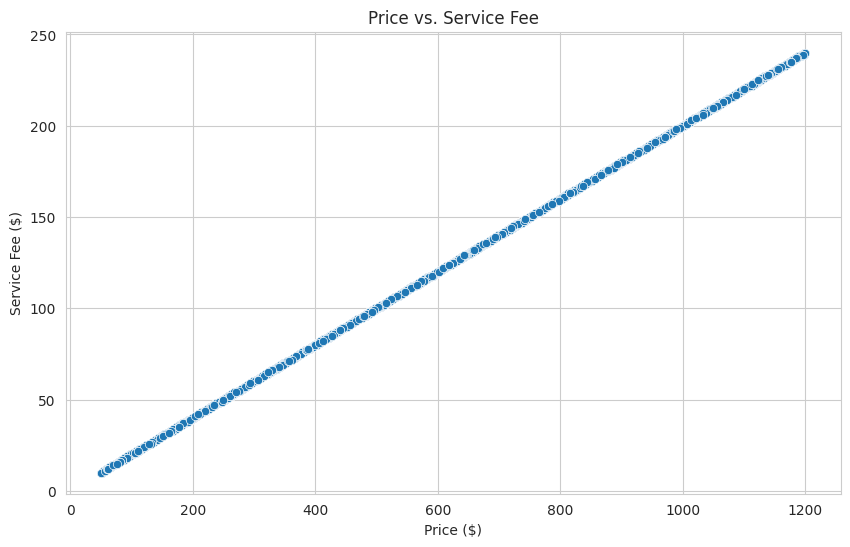

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')
    # Clean the data
    df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
    df['service fee'] = df['service fee'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
    df.dropna(subset=['price', 'service fee'], inplace=True)

    print("--- 7. Correlation between Price and Service Fee ---")
    correlation_price_service_fee = df['price'].corr(df['service fee'])
    print(f"The correlation between price and service fee is: {correlation_price_service_fee:.4f}\n")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='price', y='service fee', data=df)
    plt.title('Price vs. Service Fee')
    plt.xlabel('Price ($)')
    plt.ylabel('Service Fee ($)')
    plt.show()

except FileNotFoundError:
    print("❌ Error: Dataset file not found. Please upload the file to your Colab session.")